# RENTABILIDADES Y VOLATILIDADES DE ACTIVOS FINANCIEROS

En este notebook vamos a realizar un análisis de las rentabilidades y volatilidades de un activo financiero, explorando distintas medidas y su interpretación. Primero, calcularemos las rentabilidades porcentuales y logarítmicas, evaluando cómo difieren en su comportamiento y su uso práctico en el análisis financiero. A continuación, exploraremos las distribuciones de las rentabilidades para identificar patrones y posibles desviaciones de una distribución normal.

Además, estudiaremos la volatilidad, comúnmente utilizada como medida de riesgo, y discutiremos cómo se puede utilizar para evaluar la incertidumbre asociada a los retornos futuros del activo.

## 1. Rentabilidad y su distribución

Rentabilidad aritmética (cambio porcentual). Esta es la rentabilidad que se utiliza en los informes.

In [ ]:
import yfinance as yf

data = yf.download(["AAPL", "GLD", "MSFT", "SPY"], start="2018-12-31", end="2023-12-31")
data = data.loc[:, "Adj Close"]

[*********************100%%**********************]  4 of 4 completed


In [ ]:
data

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31,37.707062,121.250000,95.926308,228.166229
2019-01-02,37.750076,121.330002,95.501343,228.403625
2019-01-03,33.989891,122.430000,91.988022,222.953308
2019-01-04,35.440907,121.440002,96.266312,230.421280
2019-01-07,35.362015,121.860001,96.389107,232.238068
...,...,...,...,...
2023-12-22,192.868134,190.270004,372.543945,469.225250
2023-12-26,192.320221,191.720001,372.623505,471.206573
2023-12-27,192.419830,192.589996,372.036713,472.058563


In [ ]:
rentabilidad = data.pct_change(fill_method=None)
rentabilidad

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31,NaN,NaN,NaN,NaN
2019-01-02,0.001141,0.000660,-0.004430,0.001040
2019-01-03,-0.099607,0.009066,-0.036788,-0.023863
2019-01-04,0.042690,-0.008086,0.046509,0.033496
2019-01-07,-0.002226,0.003458,0.001276,0.007885
...,...,...,...,...
2023-12-22,-0.005547,0.004434,0.002784,0.002010
2023-12-26,-0.002841,0.007621,0.000214,0.004223
2023-12-27,0.000518,0.004538,-0.001575,0.001808


Lo normal sería eliminar los NaN para poder hacer operaciones con los datos.

In [ ]:
rentabilidad = data.pct_change(fill_method=None).dropna()
rentabilidad

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2019-01-02,0.001141,0.000660,-0.004430,0.001040
2019-01-03,-0.099607,0.009066,-0.036788,-0.023863
2019-01-04,0.042690,-0.008086,0.046509,0.033496
2019-01-07,-0.002226,0.003458,0.001276,0.007885
2019-01-08,0.019063,-0.002708,0.007251,0.009395
...,...,...,...,...
2023-12-22,-0.005547,0.004434,0.002784,0.002010
2023-12-26,-0.002841,0.007621,0.000214,0.004223
2023-12-27,0.000518,0.004538,-0.001575,0.001808


Graficamos las series de rentabilidades aritméticas de Apple y S&P500.

In [ ]:
rentabilidad["AAPL"]

Date
2019-01-02    0.001141
2019-01-03   -0.099607
2019-01-04    0.042690
2019-01-07   -0.002226
2019-01-08    0.019063
                ...   
2023-12-22   -0.005547
2023-12-26   -0.002841
2023-12-27    0.000518
2023-12-28    0.002226
2023-12-29   -0.005424
Name: AAPL, Length: 1258, dtype: float64

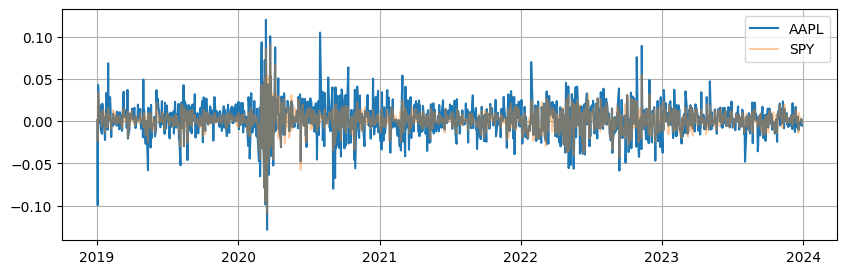

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(rentabilidad["AAPL"], label="AAPL")
plt.plot(rentabilidad["SPY"], label="SPY", alpha=0.4)
plt.grid(True)
plt.legend()
plt.show()

El argumento alpha = 0.4 sirve para indicar la transparencia de la linea que va a pintar

¿Cómo calculamos las **rentabilidades acumuladas**?

$$r_{t+1}=\frac{p_{t+1}-p_{t}}{p_{t}}$$

$$r_{t+1}=\frac{p_{t+1}}{p_{t}}-1$$

La **rentablidad acumulada** es:

$$ R_t = (1 + r_1) \times (1 + r_2) \times \dots \times (1 + r_t) - 1$$

Y la fórmula general es:

$$R_t = \left( \prod_{i=1}^{t} (1 + r_i) \right) - 1$$

## Ejercicio 1
+ Busca 3 tickers en yahoo finance.
+ Descarga el precio ajustado de los últimos 3 años.
+ Calcula la media y la desviación típicas de cada uno (aunque normalmente vayamos a usar la rentabilidad logarítmica para calcular esto, que lo veremos más adelante)

In [ ]:
# Escribe aquí tu código

Visualizar rentabilidad acumulada arimética

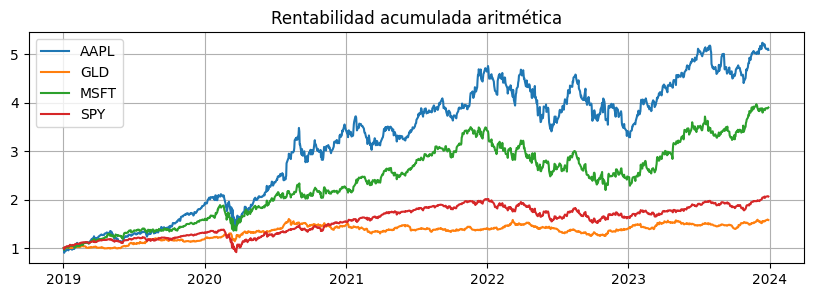

In [ ]:
rentabilidad_acum_arit = (1 + rentabilidad).cumprod() # Rentabilidad acumulada aritmética

plt.figure(figsize=(10, 3))
plt.plot(rentabilidad_acum_arit, label=rentabilidad_acum_arit.columns)
plt.title("Rentabilidad acumulada aritmética")
plt.grid(True)
plt.legend()
plt.show()

**Rentabilidad logarítmica**. Es la rentabilidad que se utiliza para realizar análisis de la rentabilidad.

La serie temporal de los precios de los activos financieros se suele modelar como una **distribución log-normal**, ya que los precios no pueden ser negativos y tienden a crecer de forma multiplicativa. Bajo este modelo, los **logaritmos de los precios siguen una distribución normal**, lo que facilita el análisis y la modelización estadística de las rentabilidades.

Ref.: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

Las razones más importantes son:
* Cuando la variación en precio es pequeña, los retornos logarítmicos son muy similares a los retornos aritméticos.
* $log(\frac{p_{d+1}}{p_{d}})$ sigue una distribución normal.
* $log(\frac{p_{d+1}}{p_{d}})=log(p_{d+1})-log(p_{d})$
* La suma es numéricamente más estable que la multiplicación cuando los números son muy pequeños.

### Usamos Numpy

Numpy es una librería también muy utilizada para tratar datos.
Es muy similar a Pandas.

El uso principal que le vamos a dar es calcular el retorno logarítmico de los activos.

In [ ]:
import numpy as np

rentabilidad_log = np.log(data).diff().dropna()
rentabilidad_log

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2019-01-02,0.001140,0.000660,-0.004440,0.001040
2019-01-03,-0.104924,0.009025,-0.037482,-0.024152
2019-01-04,0.041804,-0.008119,0.045460,0.032947
2019-01-07,-0.002228,0.003453,0.001275,0.007854
2019-01-08,0.018884,-0.002712,0.007224,0.009352
...,...,...,...,...
2023-12-22,-0.005563,0.004425,0.002780,0.002008
2023-12-26,-0.002845,0.007592,0.000214,0.004214
2023-12-27,0.000518,0.004528,-0.001576,0.001806


Si comparamos la rentabilidad aritmética con la logarítmica.

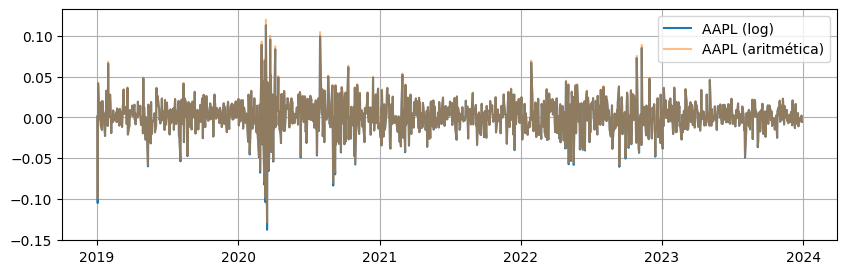

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(rentabilidad_log["AAPL"], label="AAPL (log)")
plt.plot(rentabilidad["AAPL"], label="AAPL (aritmética)", alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()

Si graficamos la diferencia entre ambas rentabilidades...

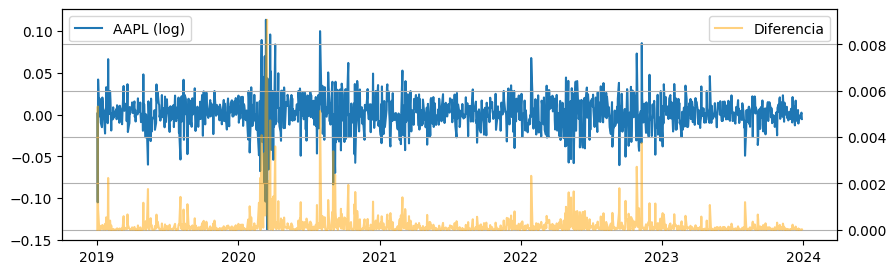

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(rentabilidad_log["AAPL"], label="AAPL (log)")
plt.legend(loc="upper left")

ax2 = ax.twinx()  # Instanciamos un segundo eje y
ax2.plot(rentabilidad["AAPL"] - rentabilidad_log["AAPL"], label="Diferencia", color="orange", alpha=0.5)
plt.legend(loc="upper right")

plt.grid(True)
plt.show()

In [ ]:
rentabilidad["AAPL"] - rentabilidad_log["AAPL"]

Date
2019-01-02    6.501668e-07
2019-01-03    5.316984e-03
2019-01-04    8.860721e-04
2019-01-07    2.481239e-06
2019-01-08    1.794287e-04
                  ...     
2023-12-22    1.544431e-05
2023-12-26    4.042920e-06
2023-12-27    1.340820e-07
2023-12-28    2.474606e-06
2023-12-29    1.476449e-05
Name: AAPL, Length: 1258, dtype: float64

 **Fórmula general de rentabilidad acumulada usando log returns:**

   $$
   R_{\text{acumulada}, t} = \sum_{i=1}^{t} r_i
   $$

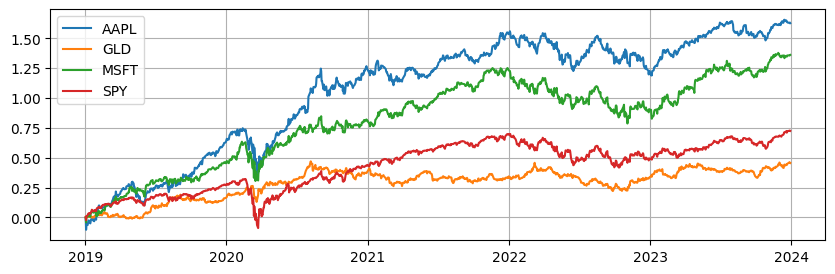

In [ ]:
rentabilidad_acum_log = rentabilidad_log.cumsum()

plt.figure(figsize=(10, 3))
plt.plot(rentabilidad_acum_log, label=rentabilidad_acum_log.columns)
plt.grid(True)
plt.legend()
plt.show()

Ahora veamos cuál es la distribución de los retornos de un activo.

* $\mu - 1\sigma \leq X \leq \mu + 1\sigma \approx 0.6827$
* $\mu - 2\sigma \leq X \leq \mu + 2\sigma \approx 0.9545$
* $\mu - 3\sigma \leq X \leq \mu + 3\sigma \approx 0.9973$

Ref.: https://es.wikipedia.org/wiki/Regla_68-95-99.7

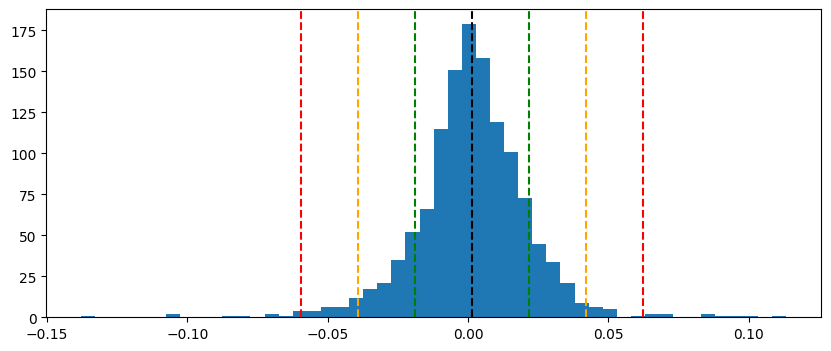

In [ ]:
# Calculamos la desviación estándar de los retornos.
sigma_aapl = rentabilidad_log["AAPL"].std()
mean_appl = rentabilidad_log["AAPL"].mean()

# Graficamos la distribución, la media y 1, 2 y 3 sigmas
plt.figure(figsize=(10, 4))
plt.hist(rentabilidad_log["AAPL"], bins=50)

# Media
plt.axvline(mean_appl, color="black", linestyle="--")

# +- 1 sigma
plt.axvline(mean_appl + (1 * sigma_aapl), color="green", linestyle="--")
plt.axvline(mean_appl - (1 * sigma_aapl), color="green", linestyle="--")

# +- 2 sigma
plt.axvline(mean_appl + (2 * sigma_aapl), color="orange", linestyle="--")
plt.axvline(mean_appl - (2 * sigma_aapl), color="orange", linestyle="--")

# +- 3 sigma
plt.axvline(mean_appl + (3 * sigma_aapl), color="red", linestyle="--")
plt.axvline(mean_appl - (3 * sigma_aapl), color="red", linestyle="--")

plt.show()

Viendo la figura, aparentemente sigue una distribución Normal (Gaussiana). Entonces, podemos caracterizar los datos mediante su media y su desviación estándar:

1. Se calcula la rentabilidad media de los retornos:

$$\bar{r} = \frac{1}{n} \sum_{i=1}^n r_i$$

2. Se calcula la varianza de los retornos:

$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2$$

3. Se calcula la desviación típica de los retornos:

$$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2}$$

La rentabilidad, varianza y desviación típica **siempre se expresa en términos anuales**:

- Si los datos son diarios, consideramos que hay 252 días al año de negociación.
- Si los datos son mensuales, consideramos que hay 12 meses al año.

In [ ]:
print(f'Rentabilidad media anualizada: {rentabilidad_log["AAPL"].mean() * 252:.4f}')
print(f'Varianza anualizada: {rentabilidad_log["AAPL"].var() * 252:.4f}')
print(f'Desviación estándar anualizada: {rentabilidad_log["AAPL"].std() * np.sqrt(252):.4f}')

Rentabilidad media anualizada: 0.3258
Varianza anualizada: 0.1039
Desviación estándar anualizada: 0.3224


PODEMOS CALCULAR Y GRAFICAR LAS RENTABILIDADES Y VOLATILIDADES ANUALES DE CADA UNO DE LOS ACTIVOS

In [ ]:
# Rentabilidad anualizada.
rentabilidad_log.mean() * 252

Ticker
AAPL    0.325841
GLD     0.091206
MSFT    0.272566
SPY     0.145132
dtype: float64

In [ ]:
# Desviación estándar anualizada.
rentabilidad_log.std() * np.sqrt(252)

Ticker
AAPL    0.322368
GLD     0.149444
MSFT    0.304932
SPY     0.210744
dtype: float64

Graficamos rentabilidad media y riesgo.

Refs.:
* Subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.subplots.html#matplotlib.figure.Figure.subplots
* Bar: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

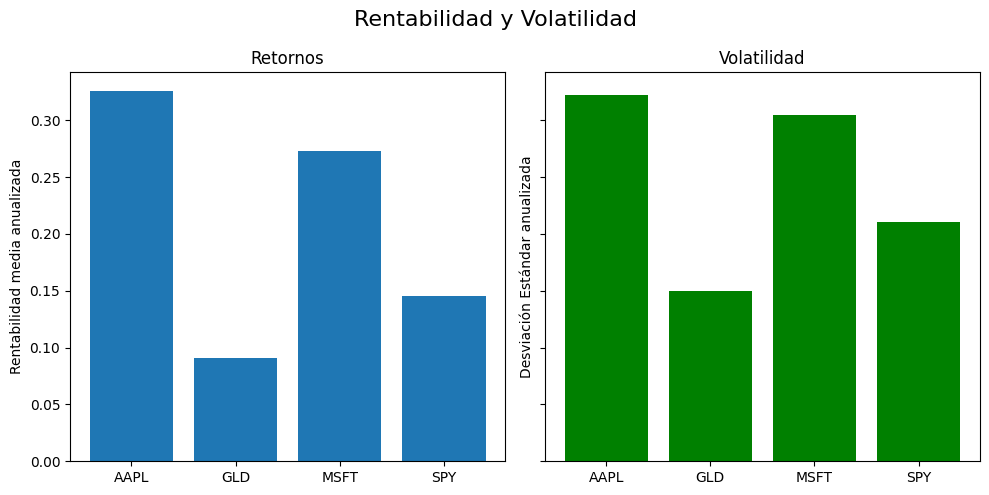

In [ ]:
import matplotlib.pyplot as plt

# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = rentabilidad_log.mean() * 252
stds = rentabilidad_log.std() * np.sqrt(252)

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Retornos")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad", fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Distribuciones de los retornos.

Ref.: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

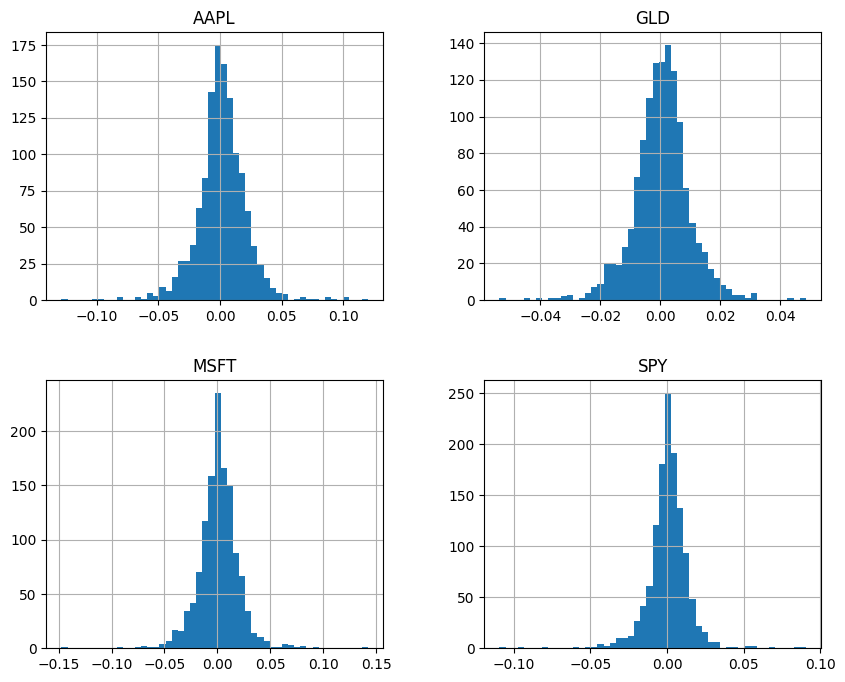

In [ ]:
rentabilidad.hist(bins=50, figsize=(10, 8))
plt.show()

Pero... ¿siguen los retornos una distribución normal?

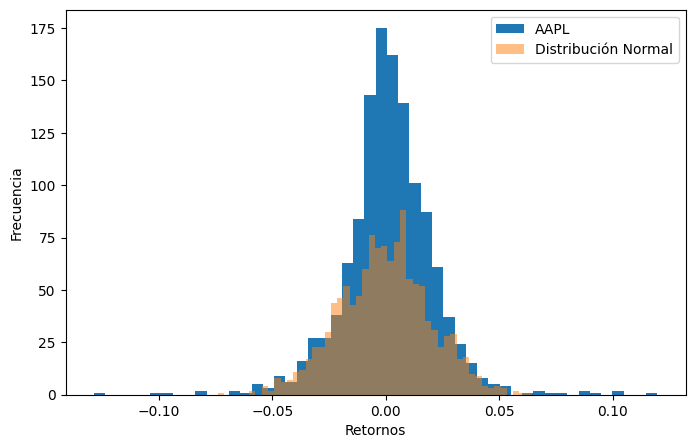

In [ ]:
# Importamos el módulo de Numpy de generación de números aleatorios.
from numpy import random

# Creamos el generador de números aleatorios por defecto.
rng = random.default_rng(seed=42)

# Generamos la misma cantidad de números aleatorios que datos tenemos de retornos.
# Centrada en cero (parámetro "loc") y con la desviación estándar de los retornos de AAPL (parámetro "scale").
aleatorios_normal = rng.normal(loc=0, scale=rentabilidad.loc[:, "AAPL"].std(), size=len(rentabilidad))

# Graficamos el histograma de los retornos y los números aleatorios.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(rentabilidad.loc[:, "AAPL"], bins=50, label="AAPL")
plt.hist(aleatorios_normal, bins=50, alpha=0.5, label="Distribución Normal")
plt.legend()
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">

# Ejercicio de Repaso: Visualización de Distribuciones de Retornos y Comparación de Volatilidades

## Objetivos:
1. Visualizar la distribución de los retornos logarítmicos de varios activos financieros.
2. Comparar las volatilidades de los activos en un periodo anualizado.

## Instrucciones:

### Parte 1: Descarga y Cálculo de Rentabilidades
1. **Descargar los datos:**
   - Utiliza `yfinance` para descargar los precios de cierre ajustados (`Adj Close`) de los siguientes activos para el periodo del 1 de enero de 2022 al 31 de diciembre de 2023:
     - Apple Inc. (AAPL)
     - Microsoft Corporation (MSFT)
     - SPDR Gold Trust ETF (0KZF.L)
   
2. **Calcular las rentabilidades logarítmicas:**
   - Calcula las rentabilidades logarítmicas diarias para cada activo y agrégalas a un DataFrame.

3. **Calcular Rentabilidad y Volatilidad Anualizada:**
   - Calcula la rentabilidad y la volatilidad anualizada para cada activo usando las rentabilidades logarítmicas diarias.

### Parte 2: Visualización de las Distribuciones de Retornos
4. **Graficar las distribuciones:**
   - Para cada activo, crea un histograma que muestre la distribución de las rentabilidades logarítmicas.
   - Superpone una curva de distribución normal basada en la media y la desviación estándar de las rentabilidades calculadas para cada activo.
   - En un solo gráfico, añade los histogramas de los tres activos para comparar visualmente sus distribuciones.
   - Añade una leyenda que indique a qué activo corresponde cada distribución.

### Parte 3: Comparación de Volatilidades
5. **Calcular y Comparar las Volatilidades:**
   - Calcula la volatilidad anualizada de las rentabilidades logarítmicas para cada activo.
   - Añade una anotación en el gráfico que indique la volatilidad anualizada de cada activo.
   - Ajusta los ejes y añade un título al gráfico, como "Comparación de las Distribuciones de Retornos y Volatilidades Anualizadas de AAPL, MSFT, y SPDR Gold Trust".

### Parte 4: Interpretación
6. **Análisis de los Resultados:**
   - Responde a las siguientes preguntas:
     1. ¿Qué activo presenta la mayor volatilidad anualizada?
     2. ¿Las distribuciones de los retornos difieren significativamente entre los activos?
     3. ¿Qué observaciones puedes hacer acerca de los riesgos relativos de estos activos basándote en sus distribuciones y volatilidades anualizadas?

## Resultado Esperado:
Al completar este ejercicio, deberías ser capaz de visualizar las distribuciones de los retornos logarítmicos, comparar las volatilidades anualizadas entre diferentes activos financieros, y obtener una comprensión más profunda de los riesgos asociados con cada activo.

</div>


_____________________________________________

## APÉNDICE

Diagrama de caja.

Ref.: https://es.wikipedia.org/wiki/Diagrama_de_caja

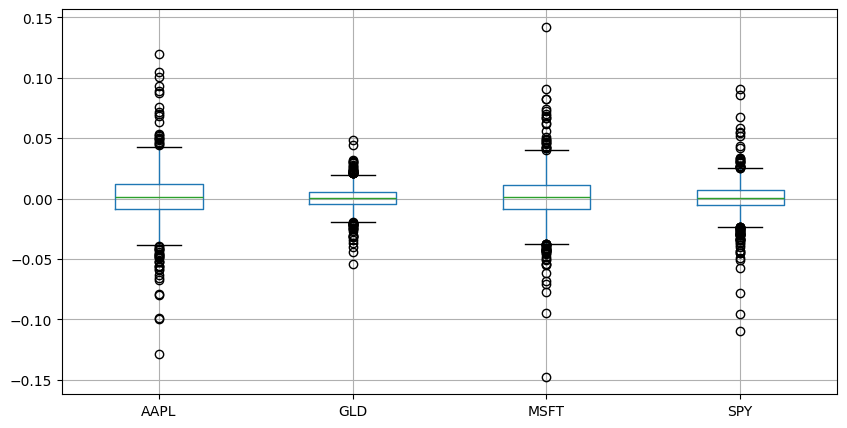

In [ ]:
rentabilidad.boxplot(figsize=(10, 5))
plt.show()

Diagrama de violín.

Ref.: https://seaborn.pydata.org/generated/seaborn.violinplot.html

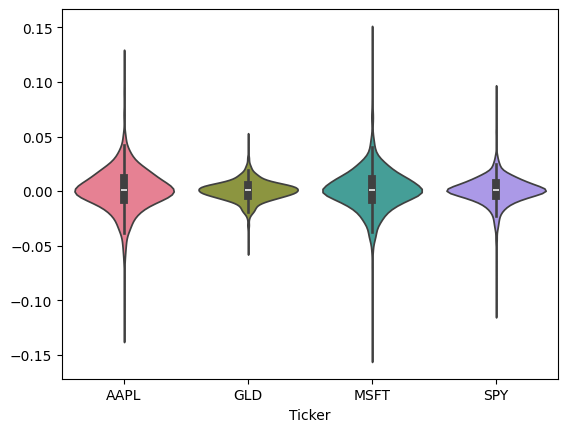

In [ ]:
# Utilizando seaborn grafica un diagrama de violin de las rentabilidades
import seaborn as sns

sns.violinplot(data=rentabilidad, palette="husl", inner="box", legend="auto")
plt.show()